In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

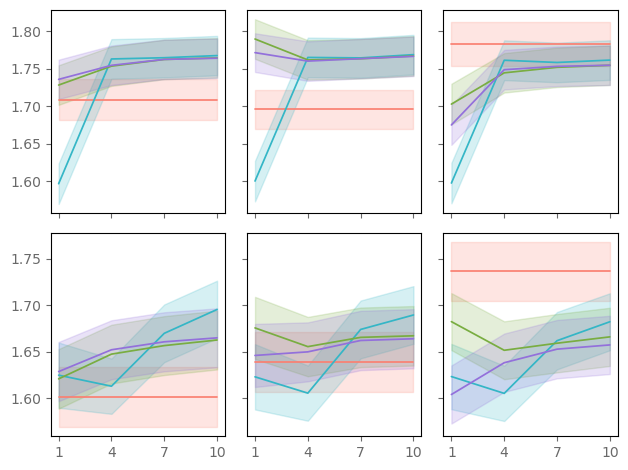

In [3]:
gp_settings = [[0,1,2],[3,4,5]]

nrct = 1000
poly_degs = [1,4,7,10]
methods = ["fax", "om-gax", "om-bax", "om-hax", "dr-bax", "dr-gax", "dr-hax", "ipw",]
methods = ["fax", "om-gax", "om-bax", "om-hax"]
plot_sigma = 2
lw = 1.25
cp = ["salmon", "#4063a3", "#34b6c6", "#533d14", "#79ad41", "#dcc000", "mediumpurple", "black"]
cp_ind = {"fax":0, "ipw":1, "om-gax":2, "om-bax":4, "om-hax":6, "dr-gax":3, "dr-bax":5, "dr-hax":7}
labels = {"fax": r"$\hat{\mu}^a_{OS-OM}$", "ipw": r"$\hat{\mu}^a_{IPSW}$",\
            "om-gax":r"$\hat{\mu}^a_{OM}$", "om-bax":r"$\hat{\mu}^a_{ABC}$", "om-hax":r"$\hat{\mu}^a_{AOM}}$",\
            "dr-gax":r"$\hat{\mu}^a_{DR-OM}$", "dr-bax":r"$\hat{\mu}^a_{DR-ABC}$", "dr-hax":r"$\hat{\mu}^a_{DR-AOM}}$"}
markers = {"fax":" ", "ipw":" ", "om-gax":" ", "om-bax":" ", "om-hax":" ", "dr-gax":" ", "dr-bax":" ", "dr-hax":" "}
line_styles = {"fax":"-", "ipw":"-", "om-gax":"-", "om-bax":"-", "om-hax":"-", "dr-gax":"-", "dr-bax":"-", "dr-hax":"-"}

par_res_dir = "subgroup_res"

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/mpx_nrct_{nrct}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["RMSE"]
            std_rmse = met_df["Std.Dev."]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')
            
#plt.legend(ncols=4, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig(f"rmse_nrct{nrct}.svg", bbox_inches="tight")

In [ ]:
nrct = 200

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/mpx_nrct_{nrct}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["Squared-Bias"]
            std_rmse = met_df["Std.Dev..1"]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"sqb_nrct{nrct}.svg", bbox_inches="tight")

In [ ]:
nrct = 200

fig, axes = plt.subplots(nrows=2, ncols=3,sharex='col', sharey='row')
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")

for i in range(2):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"{par_res_dir}/mpx_nrct_{nrct}/gp_draw_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["Variance"]
            std_rmse = met_df["Std.Dev..2"]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=0.2)
            axes[i, j].set_xticks(poly_degs)
            axes[i, j].tick_params(axis='x', colors='dimgray')
            axes[i, j].tick_params(axis='y', colors='dimgray')
        
plt.tight_layout()
plt.savefig(f"var_nrct{nrct}.svg", bbox_inches="tight")


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,2))
sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.set_style("whitegrid")


for i in range(2):
    df_res = pd.read_csv(f"{par_res_dir}/faxn_nrct_200/gp_draw_{i}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})
    df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)

    for k, pdeg in enumerate(poly_degs):
        df_res.loc[k, "Method"] = f"fax-PD-{k}"

    for met in methods:
        met_df = df_res[df_res["Method"].str.contains(met)]
        mean_rmse = met_df["RMSE"]
        std_rmse = met_df["Std.Dev."]
        lb = mean_rmse - plot_sigma * std_rmse
        ub = mean_rmse + plot_sigma * std_rmse
        axes[i].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
        axes[i].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha[met])
        axes[i].set_xticks(poly_degs)
        axes[i].tick_params(axis='x', colors='dimgray')
        axes[i].tick_params(axis='y', colors='dimgray')

plt.tight_layout()
plt.savefig(f"fax_noise.svg", bbox_inches="tight")


In [ ]:
import numpy as np
# set values for N, T, and convergence threshold
N, T, THRESH, eps = 100, 10, 1e-4, 1e-6
# load data
data = np.loadtxt(’ps4_data/data.txt’)
mu = data[:, 0:T]
y = data[:, T:T+1]
# initialize guess for r, each entry uniform on [0, 1]
r = np.random.random(T)
# run EM algorithm until convergence in norm of r, r_old
converged = False
while not converged:
r_old = r.copy()
# E-step ------
## vectorized computation of pi
## recall that pi[i] = 1 - prod_j (1 - mu[i, j] * r)
pi = 1 - np.prod(1 - mu * r, axis=1)
## check that output makes sense
if np.any(np.logical_or(pi < 0, pi > 1)):
raise Exception("pi out of range")
## vectorized computation of z_hat
## recall that z_hat[i, j] = r[j] / pi[i]
## except when mu[i, j] * y[i] = 0,
## so divide r and pi and use (mu * y)
## (broadcasted product) as mask
z_hat = np.divide(
r[:,np.newaxis], pi, where=(pi != 0)
).T * (mu * y)
## - check that output makes sense
if np.any(np.logical_or(z_hat < -eps, z_hat > 1+eps)):
print(z_hat)
raise Exception("z_hat out of range")
# M-step ------
7
